# Chande Momentum Oscillator (CMO)

https://www.investopedia.com/terms/c/chandemomentumoscillator.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEI'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
close = np.array(df['Adj Close'])

In [4]:
len(close)

746

In [5]:
n = 20
moving_period_diffs = [[(close[idx+1-n:idx+1][i] - close[idx+1-n:idx+1][i-1]) for i in range(1, len(close[idx+1-n:idx+1]))] for idx in range(0, len(close))]

In [6]:
sum_up = []
sum_down = []
for period_diffs in moving_period_diffs:
  ups = [val if val > 0 else 0 for val in period_diffs]
  sum_up = np.append(sum_up, sum(ups))
  downs = [abs(val) if val < 0 else 0 for val in period_diffs]
  sum_down = np.append(sum_down, sum(downs))

In [7]:
sum_up = np.array(sum_up)
sum_down = np.array(sum_down)


In [8]:
cmo = 100 * ((sum_up - sum_down) / (sum_up + sum_down))

In [9]:
cmo


array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -8.87939407e+00,
       -1.09001389e+01, -1.32622461e+01, -2.41958818e+00, -2.34178125e+01,
       -2.66064445e+00, -7.74495682e+00, -7.22732013e+00, -1.43486764e+01,
       -2.01045291e+01, -1.38242566e+01, -8.64957987e+00, -9.83230974e+00,
       -6.38247023e+00, -7.07380869e+00, -6.55965543e+00, -3.01833107e+00,
       -9.39869989e+00, -1.52156513e+01, -1.37796182e+01, -2.35226525e+01,
       -2.15378763e+01, -3.41476872e+01, -2.81736051e+01, -3.48589226e+01,
       -4.45102383e+01, -4.69131995e+01, -5.30015921e+01, -6.16400196e+01,
       -6.61413746e+01, -7.98766948e+01, -6.15257692e+01, -6.77528706e+01,
       -6.89274900e+01, -

In [10]:
df['CMO'] = cmo

In [11]:
df = df.fillna(0)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,CMO
Date,,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,0.000000
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,0.000000
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,0.000000
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,0.000000
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,0.000000
...,...,...,...,...,...,...,...
2022-12-26 00:00:00+05:30,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,-28.121783
2022-12-27 00:00:00+05:30,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,-29.485376
2022-12-28 00:00:00+05:30,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,-33.190592


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,CMO
Date,,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,0.0
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,0.0
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,0.0
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,0.0
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,0.0


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,CMO
Date,,,,,,,
2022-12-26 00:00:00+05:30,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700,-28.121783
2022-12-27 00:00:00+05:30,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300,-29.485376
2022-12-28 00:00:00+05:30,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900,-33.190592
2022-12-29 00:00:00+05:30,18045.699219,18229.699219,17992.800781,18191.000000,18191.000000,281100,-24.869479
2022-12-30 00:00:00+05:30,18259.099609,18265.250000,18080.300781,18105.300781,18105.300781,192000,-28.211199


Text(0.5, 0, 'Date')

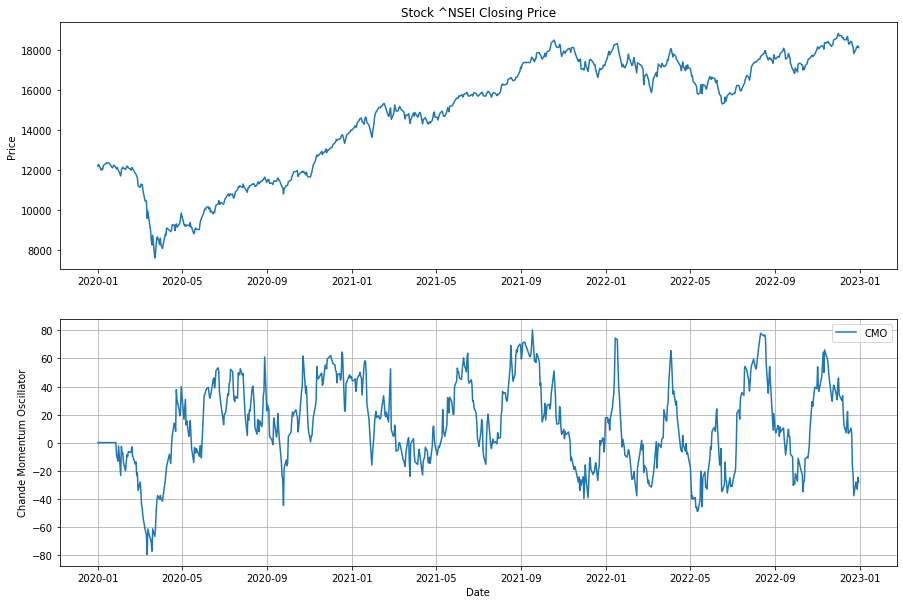

In [15]:
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CMO'], label='CMO')
ax2.grid()
ax2.set_ylabel('Chande Momentum Oscillator')
ax2.legend(loc='best')
ax2.set_xlabel('Date')

# Candlestick with Chande Momentum Oscillator

In [16]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CMO,VolumePositive
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,0.0,False
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,0.0,True
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,0.0,False
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,0.0,False
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,0.0,False


Text(0.5, 0, 'Date')

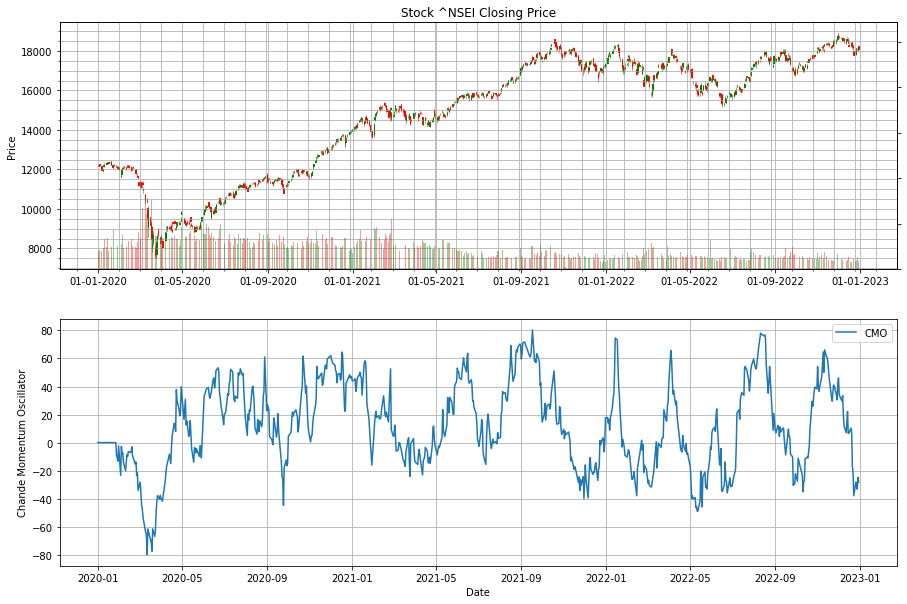

In [17]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['CMO'], label='CMO')
ax2.grid()
ax2.set_ylabel('Chande Momentum Oscillator')
ax2.legend(loc='best')
ax2.set_xlabel('Date')